In [1]:
import math
import numpy as np
import copy
import matplotlib.pyplot as plt

In [2]:
class Environment:
    def __init__(self):
        self.maze = np.array([[0.0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
        self.start = (0,0)
        self.goal = (self.maze.shape[0]-1,self.maze.shape[1]-1)
        self.goal = (0,9)
        

In [3]:
class StateNode:
    def __init__(self,parentIndex,g,h):
        self.parent = parentIndex
        self.g = g
        self.h = h
        self.f = g + h
    def getF(self):
        return self.f

In [4]:
class AStarMethod:
    def __init__(self):
        self.env = Environment()
        self.openList = {}
        self.closedList = {}
        
    def run(self):        
        # add the start point to the open list. Its g = 0, h is an estimate distance towards the goal
        self.openList[self.env.start] = StateNode(self.env.start,0,self.getH(self.env.start))
        
        while len(self.openList) > 0:
            # find the minimum element in the open list and put it into the closed list. Search its children          
            currentNode = self.moveToMinNode()
            # search for the children of the current node
            if self.searchChildren(currentNode):
                break
    def getOptimalPath(self):
        self.closedList[self.env.goal] = copy.deepcopy(self.openList[self.env.goal])
        parent = self.env.goal
        optimalPath = [parent]
        while parent != self.env.start:
            parent = self.closedList[parent].parent
            optimalPath.append(parent)
        return optimalPath
        
            
    def searchChildren(self,currentNode):
        numOfValidChildren = 0
        actions = [(0, -1), (0, 1), (-1, 0), (1, 0), (-1, -1), (-1, 1), (1, -1), (1, 1)]
        for act in actions:
            # check if 
            possibleChild = (currentNode[0]+act[0],currentNode[1]+act[1])
            
            if possibleChild[0] >= self.env.maze.shape[0] or possibleChild[0] < 0 or possibleChild[1] >= self.env.maze.shape[0] or possibleChild[1]<0:
                continue
            
            if self.env.maze.item(possibleChild) == 0:
                # Check if this child is already in the open list or the closed list
                if possibleChild in self.closedList:
                    continue
                # Update the child in the open list (update it parent or add it to the open list)
                self.updateChild(possibleChild,currentNode) 
                if possibleChild == self.env.goal:
                    return True
            else:
                continue
        return False
                
    def updateChild(self,child,parent):
        if child in self.openList:
            if self.openList[child].g > self.getG(child,parent):
                self.openList[child].g = self.getG(child,parent)
                self.openList[child].f = self.openList[child].g + self.openList[child].h
                self.openList[child].parent = parent
        else:
            self.openList[child] = StateNode(parent,self.getG(child,parent),self.getH(child))
            
            
            
    def moveToMinNode(self):
        # NOTE: use deepcopy to move elements from dict1 to dict2!! Otherwise, it is just a link
        minIndex = min(self.openList, key=lambda p: self.openList[p].f)
        self.closedList[minIndex] = copy.deepcopy(self.openList[minIndex])
        self.openList.pop(minIndex)
        return minIndex
    
    def getG(self,child,parent):
        if math.sqrt((child[0] - parent[0])**2 + (child[1] - parent[1])**2) > 1:
            return 3 + self.closedList[parent].g
        else:
            return 1 + self.closedList[parent].g
    
    def getH(self,node):
        return math.sqrt((node[0] - self.env.goal[0])**2 + (node[1] - self.env.goal[1])**2) * 2 

In [5]:
astar = AStarMethod()
astar.run()
optimalPath = astar.getOptimalPath()

(0, 9)
(1, 8)
(2, 8)
(2, 7)
(3, 7)
(3, 6)
(4, 6)
(4, 5)
(5, 5)
(5, 4)
(5, 3)
(4, 3)
(3, 3)
(2, 3)
(1, 3)
(0, 3)
(0, 2)
(0, 1)
(0, 0)
[[0.5 0.5 0.5 0.5 1.  0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.5 1.  0.  0.  0.  0.5 0. ]
 [0.  0.  0.  0.5 1.  0.  0.  0.5 0.5 0. ]
 [0.  0.  0.  0.5 1.  0.  0.5 0.5 0.  0. ]
 [0.  0.  0.  0.5 1.  0.5 0.5 0.  0.  0. ]
 [0.  0.  0.  0.5 0.5 0.5 0.  0.  0.  0. ]
 [0.  0.  0.  0.  1.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  1.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  1.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]]


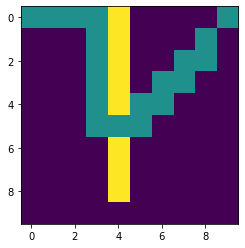

In [6]:
fig = plt.figure(1)
ax = fig.gca()

for node in optimalPath:
    print(node)
    astar.env.maze[node[0],node[1]] = 0.5
print(astar.env.maze)
plt.imshow(astar.env.maze)
